# Vector-Based Amplitude Panning (VBAP)
*Fabian Brinkmann*<br>  
*Audio Communication Group, Technische Universität Berlin*<br>  
*Contact: fabian.brinkmann@tu-berlin.de*

Vector-Based Amplitude Panning (VBAP) is simple yet powerful approach that extends stereo-panning to arbitrary loudspeaker arrays. It is used as a building block in many more complex 3D audio algorithms. In this tutorial, you will create a sound source that is moving around you on the horizontal plane. While VBAP was ioriginally intended for loudspeaker playback, we will use headphones for playback. In this setup, each loudspeaker is virtualized through a Head-Related Transfer Function (HRTF), thereby simulating the experience of listening to a loudspeaker array in an anechoic chamber.

**Duration:** 45-90 Minutes

**Requirements:** Basic knowledge of spatial hearing, HRTFs, matrix operations, coordinate conventions, and SOFA files

**References**<br>

[1] V. Pulkki (1997). Virtual Sound Source Positioning Using Vector Base Amplitude Panning. JAES, 144(5):456-466.  
[2] H. Gamper (2013). Head-related transfer function interpolation in azimuth, elevation, and distance. J. Acoust. Soc. Am., vol. 134, no. 6, pp. EL547–EL554. doi: [10.1121/1.4828983](http://dx.doi.org/10.1121/1.4828983])

**Dependencies**<br>  
`pip install pyfar>=0.7 pooch nbgrader ipykernel watermark`

In [ ]:
import pyfar as pf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

### 1. Define the virtual loudspeaker array

We could use an arbitrary loudspeaker array, however, using a regular array makes it easier to compute the panning weights in one of the next steps. Go ahead an define a virtual loudspeaker array in the horizontal plane. This only requires to decide on the loudspeaker spacing $\varphi_0$. In this tutorial, $\varphi_0$ must be even number because HRTFs are available with a spatial resolution of 2 degrees.

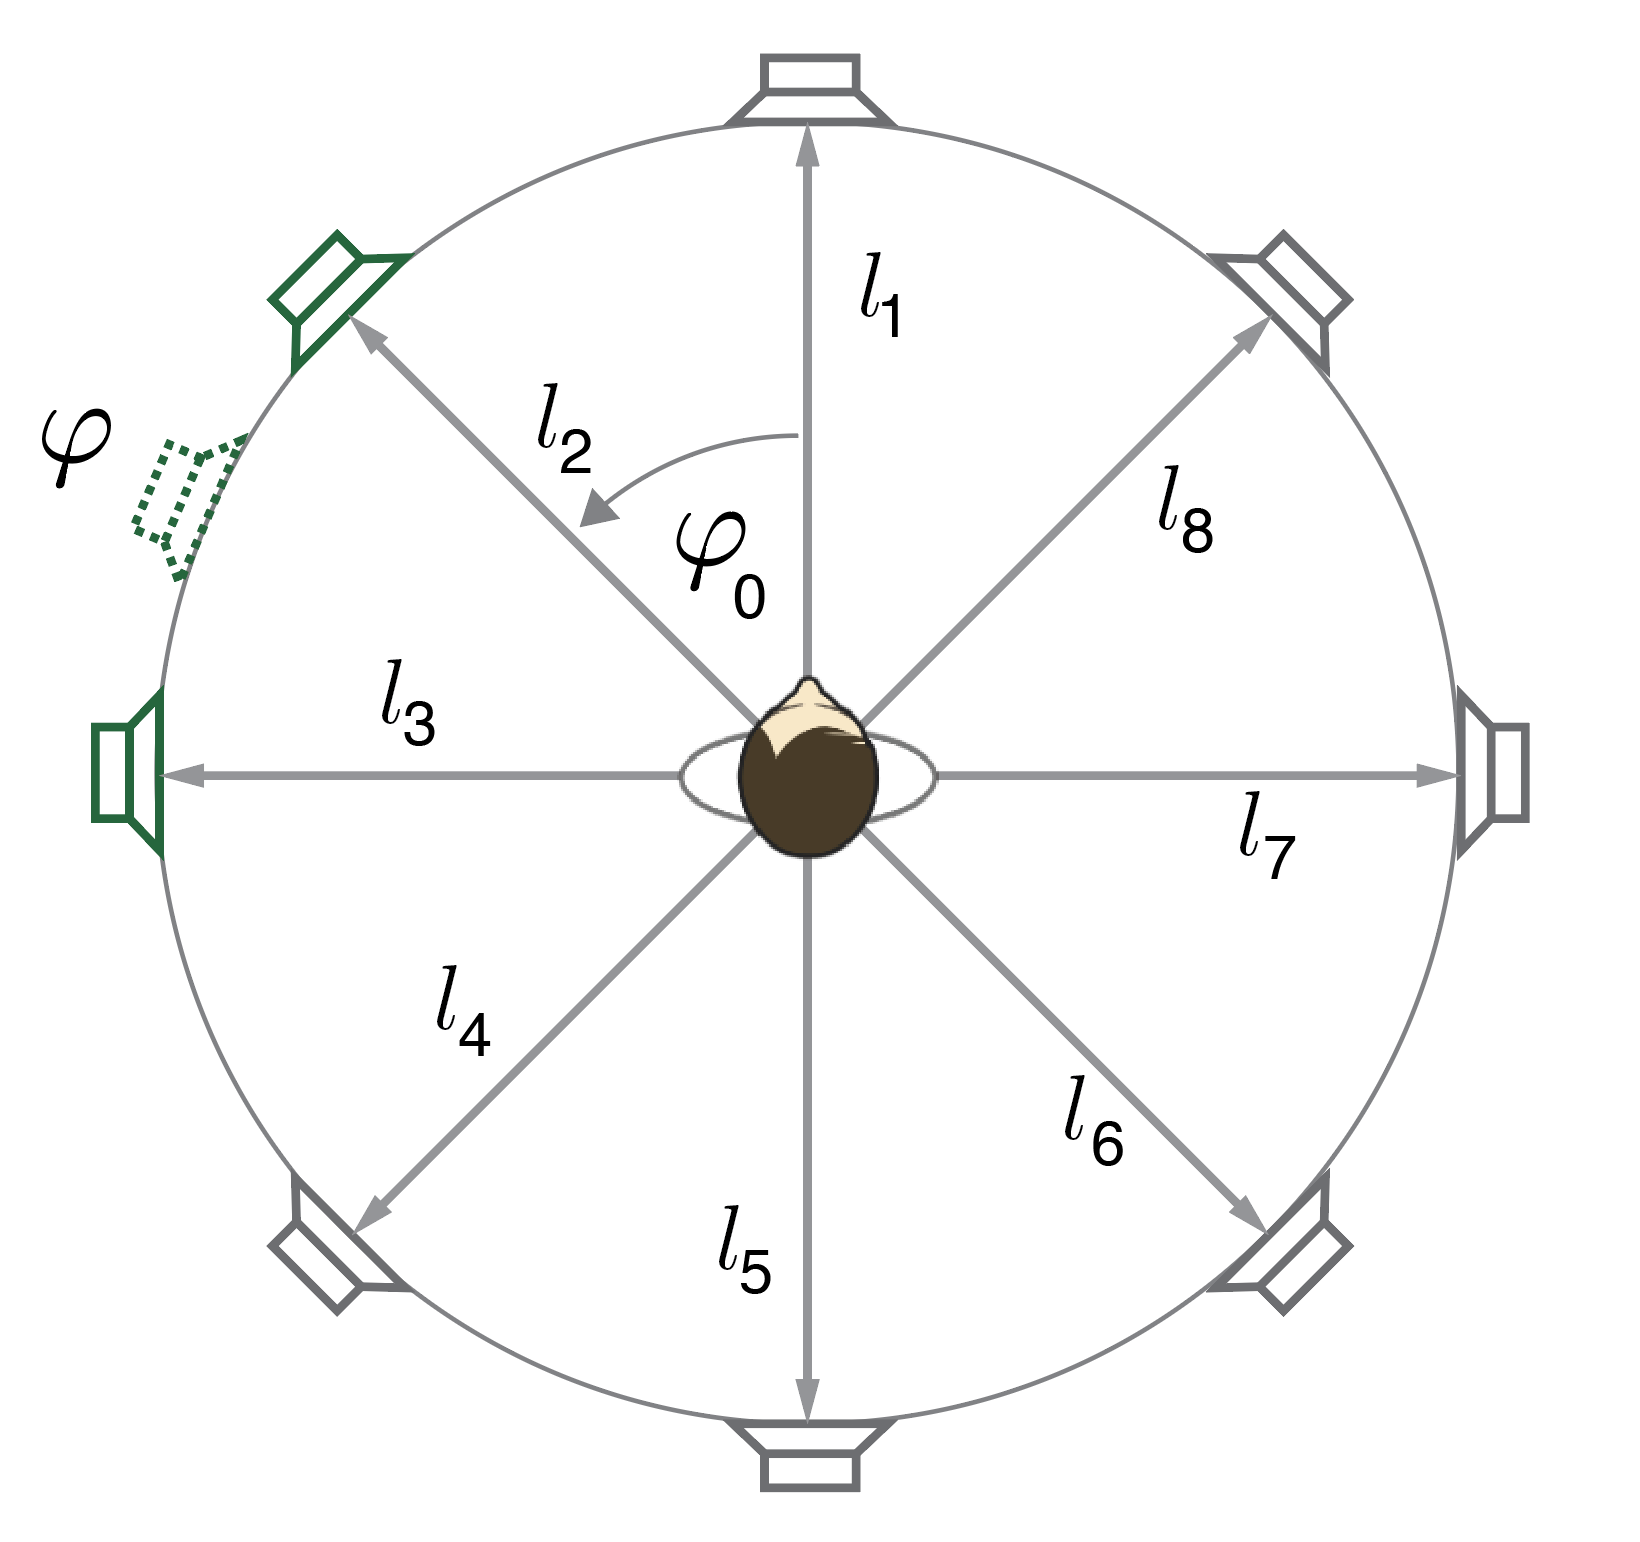

In [ ]:
# loudspeaker spacing in degrees
phi_0 = 30
assert phi_0 % 2 == 0 , 'phi_2 must be an even number but it is odd.'

# define loudspeaker positions as a pyfar Coordinates objects
# NOTE: Name this variable `loudspeaker` to use it in the plot below
# YOUR CODE HERE
raise NotImplementedError()

# visually check if the loudspeaker positions are correct, by plotting them
loudspeaker.show()
plt.show()

Next, load HRIRs to virtualize the loudspeaker array using `pf.signals.files.head_related_impulse_responses`

HINTS:
- You can directly use the loudspeaker positions defined above
- Get diffuse field compensated HRTFs, if you dont have an equalization filter for your headphones

In [ ]:
# load HRIRs
# YOUR CODE HERE
raise NotImplementedError()

### 2. Audio content

Generate or load audio content for listening. You will later generate a moving source that has the same length as the audio content.

The below generates short test signals, that could be helpful for initially coding and verifying the VBAP weights. Feel free to add more audio signals for actual listening.

In [ ]:
content = "test"
if content == "test":
    audio_in = pf.signals.noise(
        hrirs.n_samples, "pink", sampling_rate=hrirs.sampling_rate, seed=13)
# you can add any  audio signal below as long as it is a single channel signal
# YOUR CODE HERE
raise NotImplementedError()

### 3. VBAP panning weights

The goal here is to create a matrix that holds the VBAP panning weights $g$. It should have the shape `(number_of_loudspeakers, number_of_samples_of_the_audio_signal)`. This means the panning weights must be computed for each sample and loudspeaker.

The raw panning weights (without normalization) are given by
$$\mathrm{g}_\text{raw} = \mathrm{x}_\text{source}\, \mathrm{x}_\text{speaker}^{-1}$$

where $\mathrm{x}_\text{source}$ holds the x and y-position of the phantom source (defined by the angle $\varphi$ in the image above) in a $1 \times 2$ vector and $\mathrm{x}_\text{speaker}$ is a $2 \times 2$ matrix containing the x and y-positions of a pair of speakers

$$\mathrm{x}_\text{speaker} =
\begin{bmatrix}
    x_1 &y_1\\
    x_2 &y_2
\end{bmatrix}
$$

The final gains are given by $\mathrm{g} = \mathrm{g}_\text{raw} / \sqrt{g_\text{raw}[1]^2 + g_\text{raw}[2]^2}$

Assuming that you have $N$ speakers, the pairs of speakers are easy to define in this simple example:

- 1st pair: $l_1$ and $l_2$
- 2nd pair: $l_2$ and $l_3$
- ...
- Nth pair: $l_N$ and $l_1$

You have two options to find out which speaker pair is active

- compute it based on the angles $\varphi$ and $\varphi_0$, or
- compute $\mathrm{g}$ for each pair of loudspeakers. In this case, the active pair will be the only pair where both weights are greater or equal to zero.

Now start with defining the variables required to compute the VBAP weights.

In [ ]:
# phantom source angle in degree for a source moving around the listener
# YOUR CODE HERE
raise NotImplementedError()

# phantom source position as pyfar Coordinates object
# NOTE:
# - The radius must match that of the loudspeaker positions
# - Name the variable `phantom_source` to use the plot in the next cell
# YOUR CODE HERE
raise NotImplementedError()

# phantom source positions as xy coordinates
# YOUR CODE HERE
raise NotImplementedError()

# number of speakers
# YOUR CODE HERE
raise NotImplementedError()

# define and invert the 2 x 2 matrices containing the loudspeaker position for
# each pair of loudspeakers
# YOUR CODE HERE
raise NotImplementedError()

# allocate array for VBAP weights with zeros
# NOTE: Name this `vbap_weights` to use it in the plot in the next cell
# YOUR CODE HERE
raise NotImplementedError()


Next, compute visualize, and check the VBAP weights.

In [ ]:
# compute weights (sorry slow in loop)
for n_sample in range(audio_in.n_samples):

    # compute the raw panning weights for each pair of loudspeakers until you
    # find the pair for which both gains are non negative
    # YOUR CODE HERE
    raise NotImplementedError()

    # normalize gains to unit energy
    # YOUR CODE HERE
    raise NotImplementedError()

    # write current gains to gain matrix
    # YOUR CODE HERE
    raise NotImplementedError()

# plot gains (only for short test signal)
# Do you understand the plot? Does it look as it should?
if content == "test":
    fig, ax = plt.subplots(
        2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True)

    # plot VBAP gains per speaker
    ax[0].pcolormesh(
        phantom_source.azimuth / np.pi * 180,
        loudspeaker.azimuth / np.pi * 180,
        vbap_weights, cmap='Reds')
    ax[0].set_title('VBAP weights (dark red = 1, light red = 0)')
    ax[0].set_ylabel('Loudspeaker angle')

    # plot RMS sum of VBAP gains
    ax[1].plot(phantom_source.azimuth / np.pi * 180,
               np.sqrt(np.sum(vbap_weights**2, 0)))
    ax[1].set_title('Summed RMS energy of VBAP weights (must be 1 everywhere)')
    ax[1].set_xlabel('Phantom source angle')
    plt.show()

# check RMS energy of gains sums to unity
assert np.all(np.abs(np.sqrt(np.sum(vbap_weights**2, 0)) - 1) < 0.00001)

### 4. Render

To render the moving source, we need to
- apply the loudspeaker gains to the audio signal (each row in the VBAP gain matrix represents a loudspeaker),
- virtualize the loudspeaker array, by convolving each virtual speaker signal with the corresponding HRIR,
- sum the signals of all virtual loudspeakers to get the final binaural signal, and
- play it via headphones

In [ ]:
# apply VBAP weights to audio signal
# YOUR CODE HERE
raise NotImplementedError()

# convolve audio signal with HRIRs
# YOUR CODE HERE
raise NotImplementedError()

# sum all virtual loudspeaker signals
# YOUR CODE HERE
raise NotImplementedError()

# play back
# YOUR CODE HERE
raise NotImplementedError()

If you want to compare different renderings, you could for example save it to a wav-file.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### 5. Challenge

To ease the computation of the sampling weights, this tutorial used a very simple virtual loudspeaker setup. If you are interested in a general VBAP algorithm, you can have a look at the implementation in [spaudiopy](https://spaudiopy.readthedocs.io/en/latest/spaudiopy.decoder.html#spaudiopy.decoder.vbap) or implement it yourself using the [Virtual Acoustics Lab Assignment 2: VBAP and HRTF](https://pyfar-oer.readthedocs.io/en/latest/oer/courses/Virtual_Acoustics_Lab_FAU/Assignment2/Assignment2.html).

# License notice

This notebook is licensed under CC BY 4.0

# Watermark

The following watermark might help others to install specific package versions that might be required to run the notebook. Please give at least the versions of Python, IPython, numpy , and scipy, major third party packagers (e.g., pytorch), and all used pyfar packages.

In [ ]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pyfar,sofar,nbgrader,watermark

Python implementation: CPython
Python version       : 3.13.4
IPython version      : 9.1.0

numpy    : 2.3.0
scipy    : 1.15.3
pyfar    : 0.7.3
sofar    : 1.2.2
nbgrader : 0.9.5
watermark: 2.5.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

